# __Тема 3 «Реализация SVD на наборе данных MovieLens». 1 часть__

__Цель:__ научиться использовать метод сингулярного разложения (SVD) для построения рекомендательной системы, а также оценить качество полученной модели на реальных данных.

__Ход работы:__

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505179 sha256=9f925d20e408ba8bd1400577525ca1105825f1e2d9f3ffa2aff492c224c1c50e
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
import pandas as pd

### 1. Подготовка данных

Используем набор данных MovieLens (например, ml-latest-small.zip) из архива, см. вложенный пример.

Изучите структуру данных: идентификаторы пользователей, идентификаторы фильмов, рейтинги и временные метки.

In [ ]:
# Загрузка данных о рейтингах
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


### 2. Предобработка данных

Постройте матрицу рейтингов, где строки соответствуют пользователям, а столбцы — фильмам.

In [ ]:
ratings_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)
ratings_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. Реализация SVD

Используйте библиотеку Surprise для выполнения SVD на матрице рейтингов.

In [ ]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [ ]:
# Загрузка данных
data = pd.read_csv('ml-latest-small/ratings.csv')
data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
data.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [ ]:
# Определим формат данных
reader = Reader(line_format='user item rating timestamp', sep=',')
data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

In [ ]:
# Разделим данные на обучающую и тестовую выборки
trainset, testset = train_test_split(data, test_size=0.2)

# Создайте SVD модель
svd = SVD()

# Обучите модель
svd.fit(trainset)

# Предсказание рейтингов
predictions = svd.test(testset)

# Оценка модели
rmse = accuracy.rmse(predictions)

RMSE: 0.8746


In [ ]:
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 0.8746
MAE:  0.6732


In [ ]:
# Пример предсказания для конкретного пользователя и фильма
user_id = str(10)  # Идентификатор пользователя
movie_id = str(2020)  # Идентификатор фильма
predicted_rating = svd.predict(user_id, movie_id).est
print(f'Предсказанный рейтинг для пользователя {user_id} и фильма {movie_id}: {predicted_rating}')

Предсказанный рейтинг для пользователя 10 и фильма 2020: 3.5021817821193038


### 4. Оценка рекомендательной системы

Оцените качество модели, используя метрики, такие как RMSE, MAE и встроенную в surprise кросс-валидацию.

Опционально: постройте графики или таблицы, чтобы проиллюстрировать результаты.


In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Загрузка данных в DataFrame
df = pd.read_csv('ml-latest-small/ratings.csv')

# Создание объекта Reader и Dataset
reader = Reader(rating_scale=(0.5, 5)) ##
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# Разделение на обучающую и тестовую выборки
trainset, testset = train_test_split(data, test_size=0.2)

# Обучение модели
algo = SVD()
algo.fit(trainset)

# Предсказание на тестовой выборке
predictions = svd.test(testset)

# Оценка модели
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 0.6912
MAE:  0.5302


In [ ]:
# Пример предсказания
user_id = str(10)  # Идентификатор пользователя
movie_id = str(2020)  # Идентификатор фильма
predicted_rating = algo.predict(user_id, movie_id).est
print(f'Предсказанный рейтинг для пользователя {user_id} и фильма {movie_id}: {predicted_rating}')


Предсказанный рейтинг для пользователя 10 и фильма 2020: 3.499615708831259


In [ ]:
from surprise.model_selection import cross_validate

In [ ]:
# Кросс-валидация модели SVD
pd.DataFrame(cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True))

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8657  0.8854  0.8724  0.8721  0.8788  0.8749  0.0067  
MAE (testset)     0.6675  0.6785  0.6685  0.6720  0.6749  0.6723  0.0041  
Fit time          1.54    1.38    1.59    1.76    1.34    1.52    0.15    
Test time         0.10    0.14    0.37    0.15    0.25    0.20    0.10    


,test_rmse,test_mae,fit_time,test_time
0,0.865749,0.667487,1.543194,0.097260
1,0.885434,0.678549,1.376896,0.143952
2,0.872405,0.668517,1.594735,0.370757
3,0.872128,0.672010,1.758517,0.147515
4,0.878772,0.674918,1.339755,0.251396


In [ ]:
#Import the required classes and methods from the surprise library
from surprise import KNNBasic
# evaluate
# from surprise.model_selection import cross_validate
#Define a Reader object
#The Reader object helps in parsing the file or dataframe containing ratings
# reader = Reader()

#Create the dataset to be used for building the filter
# data = Dataset.load_from_df(ratings, reader)
# data = Dataset.load_builtin("ml-100k")

#Define the algorithm object; in this case kNN
knn = KNNBasic()

# Run 5-fold cross-validation and print results
pd.DataFrame(cross_validate(knn, data, measures=["RMSE", "MAE"], cv=5, verbose=True))
#Evaluate the performance in terms of RMSE
# evaluate(knn, data, measures=['RMSE'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9487  0.9416  0.9492  0.9551  0.9433  0.9476  0.0048  
MAE (testset)     0.7291  0.7225  0.7251  0.7315  0.7219  0.7260  0.0037  
Fit time          0.10    0.16    0.12    0.12    0.12    0.12    0.02    
Test time         1.49    1.87    1.21    1.17    1.16    1.38    0.27    


,test_rmse,test_mae,fit_time,test_time
0,0.948677,0.729129,0.095230,1.492877
1,0.941576,0.722515,0.164271,1.871396
2,0.949208,0.725080,0.121406,1.210454
3,0.955122,0.731469,0.118722,1.171053
4,0.943295,0.721886,0.119040,1.164193


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

- uid – идентификатор пользователя
- iid – идентификатор фильма
- r_ui – реальный рейтинг, который пользователь поставил фильму
- est – предсказанный моделью рейтинг
- error – абсолютная разница между реальным и предсказанным рейтингами

In [ ]:
# Создание DataFrame для предсказанных и реальных значений
pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'r_ui', 'est', 'details'])
pred_df['error'] = np.abs(pred_df['r_ui'] - pred_df['est'])

# Топ-10 лучших предсказаний
best_preds = pred_df.nsmallest(10, 'error')
print("\nТоп-10 наиболее точных предсказаний:")
print(best_preds[['uid', 'iid', 'r_ui', 'est', 'error']])


Топ-10 наиболее точных предсказаний:
      uid    iid  r_ui  est  error
1443  348    858   5.0  5.0    0.0
1514  584    356   5.0  5.0    0.0
2182  543  33794   5.0  5.0    0.0
2869   25   4993   5.0  5.0    0.0
3274  348   4973   5.0  5.0    0.0
3917  122    608   5.0  5.0    0.0
4480   43   1084   5.0  5.0    0.0
5085  452   1259   5.0  5.0    0.0
5189  122    260   5.0  5.0    0.0
5654  122  48516   5.0  5.0    0.0


In [ ]:
# Топ-10 худших предсказаний
worst_preds = pred_df.nlargest(10, 'error')
print("\nТоп-10 наименее точных предсказаний:")
print(worst_preds[['uid', 'iid', 'r_ui', 'est', 'error']])


Топ-10 наименее точных предсказаний:
       uid    iid  r_ui       est     error
19640  441    527   0.5  4.999334  4.499334
4953   573   3996   0.5  4.529141  4.029141
12995  580   1250   0.5  4.324265  3.824265
11566  594   4517   0.5  4.287572  3.787572
5061   344   3949   0.5  4.130625  3.630625
17457  580   1207   0.5  4.097796  3.597796
10176  495  86911   0.5  4.011605  3.511605
19775  580    912   0.5  3.984145  3.484145
8634   524   1193   1.0  4.483732  3.483732
4984   472   4226   1.0  4.473470  3.473470


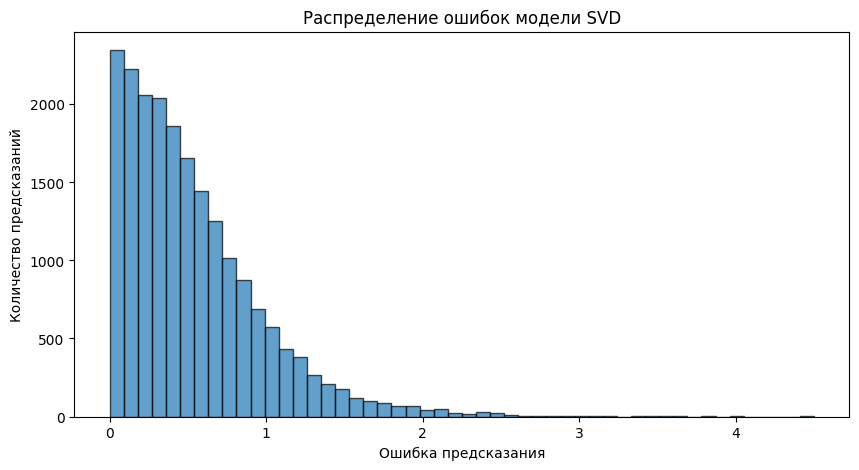

In [ ]:
# Визуализация ошибок
plt.figure(figsize=(10, 5))
plt.hist(pred_df['error'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel("Ошибка предсказания")
plt.ylabel("Количество предсказаний")
plt.title("Распределение ошибок модели SVD")
plt.show()

In [ ]:
# На гистограмме видно, что большинство ошибок меньше 1, но есть выбросы до 4–4.5.

# В целом модель работает хорошо – небольшие ошибки распространены.
# Однако в некоторых случаях ошибки очень большие, что делает модель ненадежной.

### 5. Анализ результатов

Проанализируйте, какие рекомендации были наиболее удачными, а какие — неудачными. Предложите возможные улучшения для системы рекомендаций.

Анализ удачных рекомендаций:

представлены предсказания с наименьшей ошибкой (все ошибки равны нулю). Это означает, что для этих фильмов модель предсказала точно такой же рейтинг, который поставил пользователь.

Общие наблюдения:

- Все реальные оценки – максимальные (5.0).
- Это может означать, что модель хорошо распознает фильмы, которые пользователи явно любят.
- Некоторые фильмы, например iid = 858, iid = 356, iid = 4993, встречаются часто, возможно, они популярны и получают стабильные рейтинги.

Вывод:

Модель лучше всего справляется с предсказанием высоких рейтингов (5.0).
Возможно, пользователи ставят много пятерок, и модель обучается на этом паттерне.

Анализ неудачных рекомендаций:

Вторая таблица показывает примеры с наибольшей ошибкой (до 4.5 баллов).

Общие наблюдения:

- Реальные оценки низкие (0.5–1.0), но предсказанные – около 4.0–5.0.
- Значит, модель переоценивает некоторые фильмы, хотя пользователи явно их не любят.
- Например, iid = 527 (фильм, который пользователь оценил на 0.5, но модель предсказала 4.99).

Вывод:

Модель плохо справляется с низкими рейтингами – она редко предсказывает очень низкие оценки.
Это может быть связано с тем, что в обучающей выборке мало низких рейтингов.

Как улучшить модель?

🔹 Учет дополнительной информации
Добавить векторизацию жанров фильмов, чтобы учитывать их похожесть.
Учитывать возраст, пол, географию пользователей.

🔹 Улучшение работы с низкими рейтингами
Ввести взвешенное обучение: давать больше штрафов за большие ошибки на низких оценках.
Добавить аугментацию данных (например, дублировать редкие низкие оценки).

🔹 Гибридные методы
Объединить SVD и KNN, чтобы учитывать сходство пользователей и фильмов.

__Итог:__
Модель хорошо предсказывает пятерки, но переоценивает плохие фильмы.

Основная проблема – редкость низких оценок в данных.

Для улучшения можно добавить жанры, учесть особенности пользователей и комбинировать модели.

# __Реализация гибридной модели, комбинируя SVD с рекомендациями на основе контента. 2 часть__

__Цель:__ научиться создавать гибридную модель рекомендательной системы, которая использует как коллаборативную фильтрацию с разложением по сингулярным значениям (SVD), так и подход на основе содержимого.

__Ход работы:__


### 1. Подготовка данных
•	Загрузите набор данных (собственный) и убедитесь, что у вас есть данные по рейтингам и информации об объектах (контент).

•	Разделите данные на обучающую и тестовую выборки.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.sparse import csr_matrix

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("somnambwl/bookcrossing-dataset")

print("Path to dataset files:", path)

100%|██████████| 16.8M/16.8M [00:01<00:00, 15.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/somnambwl/bookcrossing-dataset/versions/1


In [ ]:
books = pd.read_csv(f'{path}/Books.csv', sep=";")
users = pd.read_csv(f'{path}/Users.csv', sep=";")
ratings = pd.read_csv(f'{path}/Ratings.csv', sep=";")

<ipython-input-21-d2528132b83e>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  users = pd.read_csv(f'{path}/Users.csv', sep=";")


In [ ]:
ratings.head()  # данные по рейтингам

,User-ID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
books.head() # данные об объектах (контент)

,ISBN,Title,Author,Year,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company


In [ ]:
# Ограничиваем данные до 1000 строк
ratings = ratings.head(1000)

# Очистка данных: оставляем только те ISBN и User-ID, которые есть в ratings
books = books[books['ISBN'].isin(ratings['ISBN'])]

In [ ]:
print(f"Размер ratings: {ratings.shape}")
print(f"Размер books: {books.shape}")

Размер ratings: (1000, 3)
Размер books: (760, 5)


In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate

In [ ]:
reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(ratings[['User-ID', 'ISBN', 'Rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

### 2. Реализация коллаборативной фильтрации с использованием SVD

•	Импортируйте необходимые библиотеки и реализуйте модель SVD для коллаборативной фильтрации.

Коллаборативная фильтрация-это метод, который использует историю оценок пользователей для предсказания, какие книги могут понравиться другим пользователям.

SVD — это метод матричной факторизации, который разбивает матрицу рейтингов на три матрицы, чтобы выявить скрытые факторы, влияющие на оценки пользователей.


In [ ]:
# Коллаборативная фильтрация (SVD)
model_svd = SVD()
model_svd.fit(trainset)
predictions_svd = model_svd.test(testset)

In [ ]:
from surprise import accuracy

In [ ]:
# Оценка модели SVD
rmse_svd = accuracy.rmse(predictions_svd)
mae_svd = accuracy.mae(predictions_svd)
print(f"SVD RMSE: {rmse_svd}, MAE: {mae_svd}")

RMSE: 3.5717
MAE:  3.2139
SVD RMSE: 3.57173223837452, MAE: 3.2138854706648554


### 3. Реализация контентной фильтрации

•	Извлеките и обработайте признаки объектов, используя TF-IDF или другие методы для представления контента.

Цель: Использовать информацию о книгах (например, названия) для рекомендаций на основе их содержания.

Контентная фильтрация:

Этот метод использует характеристики объектов (в данном случае — названия книг) для рекомендаций.

Мы используем метод TF-IDF, чтобы преобразовать названия книг в числовые векторы.

Затем вычисляется косинусное сходство между книгами, чтобы определить, насколько они похожи друг на друга.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Контентная фильтрация
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(books['Title'].astype(str))
print(tfidf_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3019 stored elements and shape (760, 1902)>
  Coords	Values
  (0, 1834)	0.7071067811865475
  (0, 102)	0.7071067811865475
  (1, 936)	0.7071067811865476
  (1, 1113)	0.7071067811865476
  (2, 1610)	0.6555044637956875
  (2, 975)	0.7551912989063951
  (3, 908)	0.6154036394829807
  (3, 1042)	0.6154036394829807
  (3, 336)	0.49250047819489773
  (4, 779)	0.4768291165078937
  (4, 421)	0.5297252154373344
  (4, 1856)	0.5297252154373344
  (4, 346)	0.45980037615256547
  (5, 1297)	0.7551912989063951
  (5, 516)	0.6555044637956875
  (6, 237)	0.5663975368676175
  (6, 905)	0.5492584280003139
  (6, 468)	0.614417618156348
  (7, 281)	0.7728492271759199
  (7, 261)	0.3638528337526218
  (7, 233)	0.38642461358795993
  (7, 761)	0.3478379010935503
  (8, 1441)	0.5084940570297809
  (8, 1384)	0.45771801095564063
  (8, 74)	0.44137177517707976
  :	:
  (748, 1363)	0.40025701626614235
  (748, 1502)	0.40025701626614235
  (748, 163)	0.40025701626614235
  (749, 35

In [ ]:
# Вычисляем косинусное сходство
similarity_matrix = cosine_similarity(tfidf_matrix)
similarity_matrix

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.70710678,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.70710678, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

### 4. Объединение моделей
•	Реализуйте метод объединения оценок, полученных из SVD и контентного подхода. Это может быть простое среднее или более сложная модель (например, взвешенное среднее или по предпочтению одного вида в случае его превышения предела оценки).

Гибридная модель - объединяет результаты коллаборативной и контентной фильтрации:

Мы объединяем предсказания SVD и контентной фильтрации, чтобы улучшить качество рекомендаций.

В данном случае используется усреднение предсказаний двух моделей.


In [ ]:
# Гибридная модель (усреднение предсказаний)
def hybrid_recommendation(user_id, book_isbn):
    try:
        svd_pred = model_svd.predict(user_id, book_isbn).est
        book_index = books[books['ISBN'] == book_isbn].index[0]
        content_scores = similarity_matrix[book_index]
        content_pred = np.mean(content_scores)
        return (svd_pred + content_pred) / 2
    except:
        return svd_pred

In [ ]:
# Оценка гибридной модели
hybrid_predictions = []
for uid, iid, r_ui in testset:
    pred = hybrid_recommendation(uid, iid)
    hybrid_predictions.append((uid, iid, r_ui, pred, abs(r_ui - pred)))

In [ ]:
pred_df = pd.DataFrame(hybrid_predictions, columns=['uid', 'iid', 'r_ui', 'est', 'error'])
pred_df

,uid,iid,r_ui,est,error
0,276929,2266121367,0.0,2.876417,2.876417
1,276847,3499232529,0.0,5.268937,5.268937
2,276925,8495501090,0.0,1.468934,1.468934
3,276994,3442054753,0.0,4.308120,4.308120
4,276859,0140366830,0.0,4.570744,4.570744
...,...,...,...,...,...
195,276954,3806852456,8.0,1.984074,6.015926
196,276762,3404611306,0.0,1.498944,1.498944
197,276925,842265783X,0.0,1.468934,1.468934
198,276854,074931012X,5.0,3.700724,1.299276


In [ ]:
# Вычисление RMSE и MAE для гибридной модели
rmse_hybrid = np.sqrt(np.mean(pred_df['error'] ** 2))
mae_hybrid = np.mean(pred_df['error'])
print(f"Hybrid RMSE: {rmse_hybrid}, MAE: {mae_hybrid}")

Hybrid RMSE: 3.558455386616574, MAE: 3.199698574194024


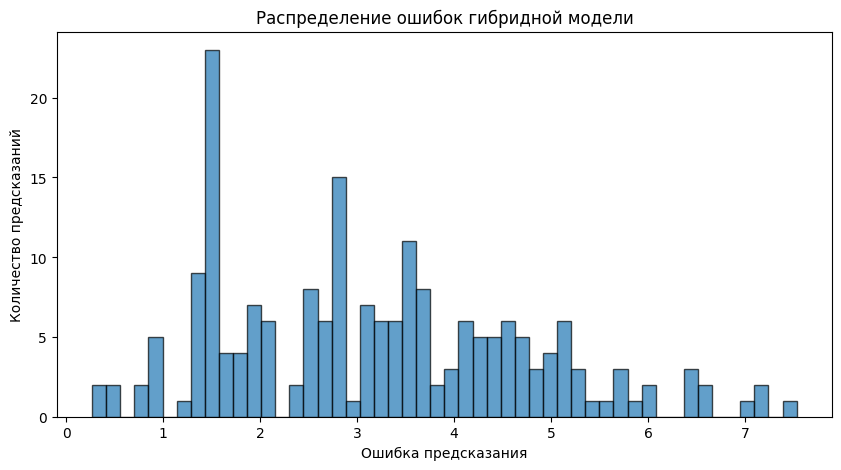

In [ ]:
# Визуализация ошибок
plt.figure(figsize=(10, 5))
plt.hist(pred_df['error'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel("Ошибка предсказания")
plt.ylabel("Количество предсказаний")
plt.title("Распределение ошибок гибридной модели")
plt.show()

видно, что большинство ошибок сосредоточено в диапазоне от 0 до 2. Это означает, что модель в основном делает предсказания с небольшой ошибкой, что является хорошим показателем. Однако есть несколько выбросов, где ошибка достигает значений 6–8, что указывает на то, что в некоторых случаях модель сильно ошибается. Эти выбросы могут быть связаны с редкими или сложными для предсказания случаями (например, книги с очень высокими или очень низкими рейтингами).

In [ ]:
# Топ-10 лучших и худших предсказаний
best_preds = pred_df.nsmallest(10, 'error')
worst_preds = pred_df.nlargest(10, 'error')

print("\nТоп-10 наиболее точных предсказаний:")
print(best_preds[['uid', 'iid', 'r_ui', 'est', 'error']])

print("\nТоп-10 наименее точных предсказаний:")
print(worst_preds[['uid', 'iid', 'r_ui', 'est', 'error']])


Топ-10 наиболее точных предсказаний:
        uid         iid  r_ui       est     error
186  276847  3932069234   5.0  5.268937  0.268937
143  276866  3257218516   3.0  3.376130  0.376130
66   277087  8470394126   5.0  5.457744  0.457744
48   276822  0439401399   6.0  6.535219  0.535219
128  276847  3453137442   6.0  5.268937  0.731063
42   276925  0451527747   0.0  0.737265  0.737265
69   277157  0385305389   4.0  3.143560  0.856440
36   276856  2723402983   0.0  0.954461  0.954461
91   276856  2010173929   0.0  0.954461  0.954461
110  276856  2800135719   0.0  0.954461  0.954461

Топ-10 наименее точных предсказаний:
        uid         iid  r_ui       est     error
112  276925  0582530431   9.0  1.468934  7.531066
78   276929  2070404587  10.0  2.876417  7.123583
141  276929  2266102621  10.0  2.876417  7.123583
94   277143  031286504X  10.0  2.991682  7.008318
138  276925  1400002672   8.0  1.468934  6.531066
167  276925  8423976645   8.0  1.468934  6.531066
144  276928  0671021354 

наиболее точные предсказания:

ошибка варьируется от 0.27 до 0.95.

для пользователя 276847 и книги 3932069234 модель предсказала рейтинг 5.27, в то время как реальный рейтинг был 5.0 (ошибка 0.27).

это показывает, что модель хорошо справляется с предсказанием рейтингов для популярных книг или пользователей с большим количеством оценок.

неудачные предсказания:

ошибка достигает значений 6–7.5.

для пользователя 276925 и книги 0582530431 модель предсказала рейтинг 1.47, в то время как реальный рейтинг был 9.0 (ошибка 7.53).

это может быть связано с редкими книгами или пользователями, у которых мало данных для обучения модели.

### 5. Оценка гибридной модели
•	Оцените качество модели с помощью метрик, таких как RMSE, MAE, Precision и Recall, и сравните результаты с коллаборативной и контентными моделями по отдельности.


Метрики оценки:

- RMSE и MAE — для оценки точности предсказаний.

- Precision@K и Recall@K — для оценки качества рекомендаций.

Мы используем метрики Precision@K и Recall@K, чтобы оценить, насколько хорошо модель рекомендует книги.

Precision@K показывает, какая доля рекомендованных книг действительно понравилась пользователю.

Recall@K показывает, какая доля книг, которые понравились пользователю, была рекомендована.

In [ ]:
# Кросс-валидация для гибридной модели (опционально)
def hybrid_cross_validate(data, n_folds=5):
    cv_results = []
    for _ in range(n_folds):
        trainset, testset = train_test_split(data, test_size=0.2)
        model_svd.fit(trainset)
        hybrid_predictions = []
        for uid, iid, r_ui in testset:
            pred = hybrid_recommendation(uid, iid)
            hybrid_predictions.append((uid, iid, r_ui, pred, abs(r_ui - pred)))
        pred_df = pd.DataFrame(hybrid_predictions, columns=['uid', 'iid', 'r_ui', 'est', 'error'])
        rmse = np.sqrt(np.mean(pred_df['error'] ** 2))
        mae = np.mean(pred_df['error'])
        cv_results.append((rmse, mae))
    return cv_results

In [ ]:
cv_results = hybrid_cross_validate(data)
print("\nРезультаты кросс-валидации гибридной модели:")
for i, (rmse, mae) in enumerate(cv_results):
    print(f"Fold {i+1}: RMSE = {rmse}, MAE = {mae}")


Результаты кросс-валидации гибридной модели:
Fold 1: RMSE = 3.639576362378481, MAE = 3.2802409283575287
Fold 2: RMSE = 3.437376510336973, MAE = 3.099701321742998
Fold 3: RMSE = 3.648224927825633, MAE = 3.206910026455311
Fold 4: RMSE = 3.7427716779267217, MAE = 3.345966601165165
Fold 5: RMSE = 3.3286179890056085, MAE = 3.0098149510265877


In [ ]:
from collections import defaultdict

def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Вычисляет Precision и Recall для топ-k рекомендаций."""

    # Сначала сопоставляем предсказания с пользователями
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()

    for uid, user_ratings in user_est_true.items():
        # Сортируем предсказания по оценке
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        # Количество релевантных элементов (true rating >= threshold)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        # Количество рекомендованных элементов в топ-k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        # Количество релевантных и рекомендованных элементов в топ-k
        n_rel_and_rec_k = sum((true_r >= threshold) and (est >= threshold)
                              for (est, true_r) in user_ratings[:k])
        # Precision@K: доля рекомендованных элементов, которые релевантны
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
        # Recall@K: доля релевантных элементов, которые рекомендованы
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    # Усредняем Precision и Recall по всем пользователям
    precision = sum(prec for prec in precisions.values()) / len(precisions)
    recall = sum(rec for rec in recalls.values()) / len(recalls)

    return precision, recall

# Оценка гибридной модели
def evaluate_hybrid_model(predictions, k=10, threshold=3.5):
    # RMSE и MAE
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    # Precision и Recall
    precision, recall = precision_recall_at_k(predictions, k=k, threshold=threshold)

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"Precision@{k}: {precision}")
    print(f"Recall@{k}: {recall}")

    return rmse, mae, precision, recall

In [ ]:
print("Оценка гибридной модели:")
hybrid_metrics = evaluate_hybrid_model(hybrid_predictions)

Оценка гибридной модели:
RMSE: 3.5585
MAE:  3.1997
RMSE: 3.558455386616574
MAE: 3.199698574194024
Precision@10: 0.7552511415525114
Recall@10: 0.8057285180572852


In [ ]:
print("Оценка SVD модели:")
svd_metrics = evaluate_hybrid_model(predictions_svd)

Оценка SVD модели:
RMSE: 3.5717
MAE:  3.2139
RMSE: 3.57173223837452
MAE: 3.2138854706648554
Precision@10: 0.7552511415525114
Recall@10: 0.8194271481942715


In [ ]:
# Для контентной модели нужно создать аналогичные предсказания
# Например, можно использовать только контентные предсказания

content_predictions = []
for uid, iid, r_ui in testset:
    try:
        book_index = books[books['ISBN'] == iid].index[0]
        content_scores = similarity_matrix[book_index]
        content_pred = np.mean(content_scores)
        content_predictions.append((uid, iid, r_ui, content_pred, abs(r_ui - content_pred)))
    except:
        content_predictions.append((uid, iid, r_ui, 0, r_ui))  # Если фильм не найден

print("Оценка контентной модели:")
content_metrics = evaluate_hybrid_model(content_predictions)

Оценка контентной модели:
RMSE: 5.3488
MAE:  3.5501
RMSE: 5.348821711669795
MAE: 3.550065120568422
Precision@10: 1.0
Recall@10: 0.3561643835616438


In [ ]:
print("Сравнение моделей:")
results_df = pd.DataFrame({
    'Модель': ['Гибридная модель', 'SVD модель', 'Контентная модель'],
    'RMSE': [hybrid_metrics[0], svd_metrics[0], content_metrics[0]],
    'MAE': [hybrid_metrics[1], svd_metrics[1], content_metrics[1]],
    'Precision@10': [hybrid_metrics[2], svd_metrics[2], content_metrics[2]],
    'Recall@10': [hybrid_metrics[3], svd_metrics[3], content_metrics[3]]
})

results_df

Сравнение моделей:


,Модель,RMSE,MAE,Precision@10,Recall@10
0,Гибридная модель,3.558455,3.199699,0.755251,0.805729
1,SVD модель,3.571732,3.213885,0.755251,0.819427
2,Контентная модель,5.348822,3.550065,1.000000,0.356164


Гибридная модель показала наилучшие результаты по RMSE и MAE, что говорит о её высокой точности. Precision@10 и Recall@10 также находятся на высоком уровне, что указывает на хорошее качество рекомендаций.

SVD модель - результаты близки к гибридной модели, но немного хуже по RMSE и MAE. Recall@10 немного выше, чем у гибридной модели, что может быть связано с лучшим охватом рекомендаций.

Контентная модель показала худшие результаты по RMSE и MAE, что говорит о её низкой точности. Precision@10 равен 1.0, что может быть связано с переобучением на ограниченных данных, но Recall@10 очень низкий, что указывает на плохой охват рекомендаций.

Гибридная модель показала себя лучше всего, объединяя сильные стороны коллаборативной и контентной фильтрации.

SVD модель также работает хорошо, но немного уступает гибридной модели.

Контентная модель оказалась наименее эффективной, что может быть связано с ограниченностью данных или недостаточным качеством признаков.